# Curl

A quantity associated with a vector field is termed as "the curl", which describes how a vector field is _turning_ at a point. We take the case of a two dimensional vector field for now. Consider, a two dimension vector field as follows:

$$ \vec{F}(x,y) = -\sin{y}\hat{i} + \cos{x}\hat{j} $$

Suppose we wish to find the tendency of the vector field to rotate at a point $(x,y)$. Take the analogy of fluids. The vector field represents the velocity of the fluid at each point, the curl then represents the direction and the magnitude of rotation a fan with its axel placed normal to the water surface will have.

We plot the vector field, along with the rotation at the said point.

<IPython.core.display.Javascript object>


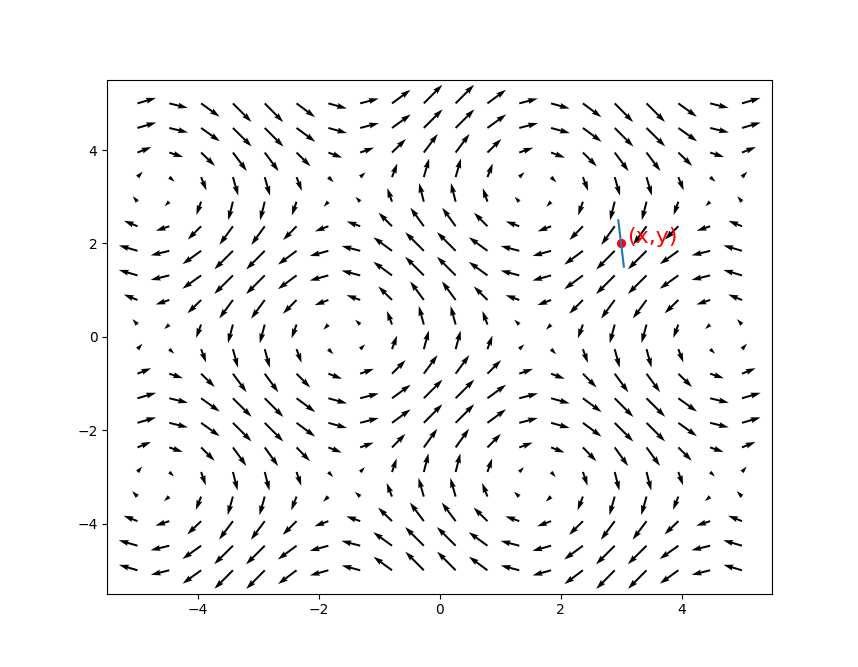

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

X, Y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
U, V = (-np.sin(Y), np.cos(X))

# Variables for animation
xpt = 3
ypt = 2
line_length = 0.5
frames = np.linspace(0, 2*np.pi, 120)

def update(angle):
    line.set_data([xpt - line_length*np.cos(-angle), xpt + line_length*np.cos(-angle)], [ypt - line_length*np.sin(-angle), ypt + line_length*np.sin(-angle)])
    return line,

# Plot the functions
fig = plt.figure()
ax = plt.axes()

ax.quiver(X, Y, U, V)
line, = ax.plot([xpt - line_length/2, xpt + line_length/2], [ypt, ypt])
ax.text(xpt + 0.1, ypt, "(x,y)", color="red", fontsize=16)
ax.scatter([xpt], [ypt], s=32, color="red")
fig.canvas.draw()
ani = matplotlib.animation.FuncAnimation(fig, update, frames=frames, blit=True, interval=10)
plt.show()

## Derivation of the Curl

So how do we caculate this? One way to think of it, is to reduce it to a simpler fluid dynamics problem. Given a velocity vector field of the fluid, how do we find circulation around an arbitrary curve?

Let us look at the follow diagram:

![Derivation of the Curl](curl-derivation.png)


Here we define the velocity field as:

$$ \vec{F}(x,y) = M(x,y)\hat{i} + N(x,y)\hat{j} $$

We note that the velocity flow around the box will be the sum of the flow of velocity along the directions of $C1, C2, C3$ and $C4$.

### Flow around the box

On $C1$ we have: 
$$\vec{F}(x,y)\cdot{\Delta x}\hat{i} = M(x,y)\Delta x$$
On $C2$ we have:
$$\vec{F}(x + \Delta x,y)\cdot{\Delta y}\hat{j} = N(x + \Delta x,y)\Delta y$$
On $C3$ we have:
$$\vec{F}(x,y + \Delta y)\cdot{-\Delta x}\hat{i} = -M(x,y + \Delta y)\Delta x$$
On $C3$ we have:
$$\vec{F}(x,y + \Delta y)\cdot{-\Delta y}\hat{i} = -N(x, y)\Delta y$$

Adding them all we have the total circulation as:

$$M(x,y)\Delta x + N(x + \Delta x,y)\Delta y - M(x,y + \Delta y)\Delta x - N(x, y)\Delta y$$

Rearranging:

$$\frac{N(x + \Delta x,y) - N(x,y)}{\Delta x}\Delta x\Delta y - \frac{M(x,y + \Delta y) - M(x, y)}{\Delta y}\Delta x\Delta y$$

Thus,

$$\text{Circ} = \frac{\partial N}{\partial x}\Delta x\Delta y - \frac{\partial M}{\partial y}\Delta x\Delta y$$


Note the term $\Delta x \Delta y$, this is the infintesimal area term. If we divide this circulation by this area, we get what we term as **circulation density**.

$$ \text{Circulation Density} = \frac{\partial N}{\partial x} - \frac{\partial M}{\partial y} $$

Since the orientation of our curve is clockwise, this applies to a clockwise curve. If it were counter-clockwise, the negative signs would be swapped between the partial derivatives.

It is *this* quantity, the circulation density, is what we define as the **curl**. The curl tells us how much fluid is circulating around a point in space. 

Notice, that we can get the above expression from the following matrix:

$$
\det{\begin{bmatrix}
\hat{i} && \hat{j} && \hat{k} \\
\frac{\partial}{\partial x} && \frac{\partial}{\partial y} && 0 \\
M(x,y) && N(x,y) && 0 \\
\end{bmatrix}}
$$

We get the above determinant as:

$$ (\frac{\partial N}{\partial x} - \frac{\partial M}{\partial y}) \hat{k} $$

For 2D vectors, the direction of the curl is always perpendicular to the plane, while in the case of 3-dimension vectors, the direction of the curl is perpendicular to the plane of rotation at a certain point. 

We thus have a vector definition of a curl, that can be generalized to three dimensions:

$$ \text{curl}\vec{F} = \vec{\nabla} \times \vec{F} $$

Where $\vec{\nabla} = \frac{\partial}{\partial x}\hat{i} + \frac{\partial}{\partial y}\hat{j} + \frac{\partial}{\partial z}\hat{k}$